# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [6]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import MUET
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
import os
import pandas as pd
import numpy as np

# Instantiating a downloader object

In [5]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['MEUT'])
downloader.download_extract('MEUT.zip', 'MEUT/')

# Instantiating a digestor object

In [9]:
dataset = MUET('MEUT/fm6xzxnf36-2/', os.listdir('MEUT/fm6xzxnf36-2/'), [3])
mining_params = {
    'win_len': 10000,
    'hop_len': 5000
}
dataset.mine(mining_params)

# Aggregating data over the third channel

In [10]:
df = pd.concat(dataset.data[3]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,state,severity,load
0,0.7986,0.8960,0.6243,0.4459,1.2031,0.9130,0.8219,1.8036,1.1858,0.7346,...,0.6118,0.8827,1.2113,1.1551,0.8815,0.6021,0.8313,inner,1.3mm,200watt
1,0.7810,1.2659,0.9953,1.2410,1.0475,0.6576,1.5384,0.8313,1.7489,0.6683,...,0.7775,0.9789,1.2324,1.1918,0.7270,0.5174,1.0981,inner,1.3mm,200watt
2,1.2857,1.3102,0.8466,1.0874,1.0952,1.1043,1.3179,0.9843,0.8779,0.8670,...,1.0587,1.1885,0.9161,0.9679,0.6036,1.1203,0.6166,inner,1.3mm,200watt
3,0.9648,0.9781,1.0451,0.8482,1.3756,0.7876,1.1318,0.6253,1.2766,1.2711,...,1.5126,0.9747,1.0453,1.3769,1.0667,1.0813,1.0072,inner,1.3mm,200watt
4,0.5621,1.2204,0.7832,1.0447,0.4806,0.5602,0.6200,1.2790,1.3010,0.6546,...,1.0305,1.0809,0.7485,0.8370,0.9172,1.1815,0.7996,inner,1.3mm,200watt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1.1333,1.0647,1.0057,0.9308,0.9584,0.7640,0.7204,0.8193,0.8335,0.9000,...,1.1683,1.1828,1.1728,1.1462,1.1098,1.0133,0.9573,healthy,-,with with
949,1.1124,1.0830,0.9493,0.9067,0.9229,0.7486,0.7436,0.7156,0.7114,0.7514,...,1.1864,1.1791,1.1298,0.9603,0.9554,0.8857,0.8053,healthy,-,with with
950,0.9498,0.8349,0.8612,0.9097,0.9825,1.0573,1.1616,1.1726,1.1897,1.1852,...,1.1295,1.1739,1.1008,0.9265,0.8579,0.7646,0.7966,healthy,-,with with
951,0.8021,0.6988,0.7541,0.8113,0.8752,0.9022,1.1178,1.1399,1.1692,1.1779,...,1.1629,1.1838,1.1569,1.0788,0.9513,0.9549,0.8471,healthy,-,with with


In [11]:
signals, metadata = df.iloc[:, : -3], df.iloc[:, -3 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.7986,0.8960,0.6243,0.4459,1.2031,0.9130,0.8219,1.8036,1.1858,0.7346,...,1.2805,0.8710,1.0844,0.6118,0.8827,1.2113,1.1551,0.8815,0.6021,0.8313
1,0.7810,1.2659,0.9953,1.2410,1.0475,0.6576,1.5384,0.8313,1.7489,0.6683,...,1.2072,0.5706,1.2001,0.7775,0.9789,1.2324,1.1918,0.7270,0.5174,1.0981
2,1.2857,1.3102,0.8466,1.0874,1.0952,1.1043,1.3179,0.9843,0.8779,0.8670,...,1.3913,1.3047,0.9267,1.0587,1.1885,0.9161,0.9679,0.6036,1.1203,0.6166
3,0.9648,0.9781,1.0451,0.8482,1.3756,0.7876,1.1318,0.6253,1.2766,1.2711,...,1.0630,0.7381,0.9506,1.5126,0.9747,1.0453,1.3769,1.0667,1.0813,1.0072
4,0.5621,1.2204,0.7832,1.0447,0.4806,0.5602,0.6200,1.2790,1.3010,0.6546,...,0.8862,1.0657,0.9602,1.0305,1.0809,0.7485,0.8370,0.9172,1.1815,0.7996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1.1333,1.0647,1.0057,0.9308,0.9584,0.7640,0.7204,0.8193,0.8335,0.9000,...,0.9696,1.1463,1.1494,1.1683,1.1828,1.1728,1.1462,1.1098,1.0133,0.9573
949,1.1124,1.0830,0.9493,0.9067,0.9229,0.7486,0.7436,0.7156,0.7114,0.7514,...,1.1253,1.1974,1.1655,1.1864,1.1791,1.1298,0.9603,0.9554,0.8857,0.8053
950,0.9498,0.8349,0.8612,0.9097,0.9825,1.0573,1.1616,1.1726,1.1897,1.1852,...,1.1352,1.1830,1.1776,1.1295,1.1739,1.1008,0.9265,0.8579,0.7646,0.7966
951,0.8021,0.6988,0.7541,0.8113,0.8752,0.9022,1.1178,1.1399,1.1692,1.1779,...,1.0087,1.1645,1.1937,1.1629,1.1838,1.1569,1.0788,0.9513,0.9549,0.8471


In [12]:
metadata

,state,severity,load
0,inner,1.3mm,200watt
1,inner,1.3mm,200watt
2,inner,1.3mm,200watt
3,inner,1.3mm,200watt
4,inner,1.3mm,200watt
...,...,...,...
948,healthy,-,with with
949,healthy,-,with with
950,healthy,-,with with
951,healthy,-,with with


In [13]:
metadata['comb'] = metadata['state'] + '_' + metadata['severity'] + '_' + metadata['load']
metadata['comb'].value_counts()

,count
comb,
inner_0.9mm_100watt,29
outer_1.1mm_200watt,29
inner_1.1mm_300watt,28
inner_1.5mm_200watt,28
inner_1.3mm_100watt,27
outer_0.9mm_200watt,27
inner_0.7mm_100watt,27
outer_0.9mm_100watt,27
outer_1.7mm_100watt,26


# Signal Processing

## Envelope Extraction

In [14]:
signals_env = env(signals)
signals_env.shape

(953, 10000)

# FFT

In [15]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 4500], 'bandpass', fs = 10000, output='sos')

In [16]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(953, 5000)

# ZoomedFFT

In [17]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 10000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(953, 2000)

# STFT

In [18]:
STFT_window = scipy.signal.windows.hann(1024)
STFT_freq_filter = scipy.signal.butter(25, [5, 4500], 'bandpass', fs = 10000, output='sos')
signals_env_STFT = stft(signals_env, 1024, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(953, 45, 512)

# Statistical Features

In [19]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,0.970416,0.079878,1.010735
1,0.971817,0.071152,1.007760
2,0.969744,0.064595,1.002496
3,0.968838,0.061113,0.999880
4,0.970059,0.056742,0.998878
...,...,...,...
948,0.982739,0.027171,0.996467
949,0.982324,0.027039,0.995992
950,0.980701,0.027028,0.994386
951,0.981535,0.027043,0.995215


# Visualization

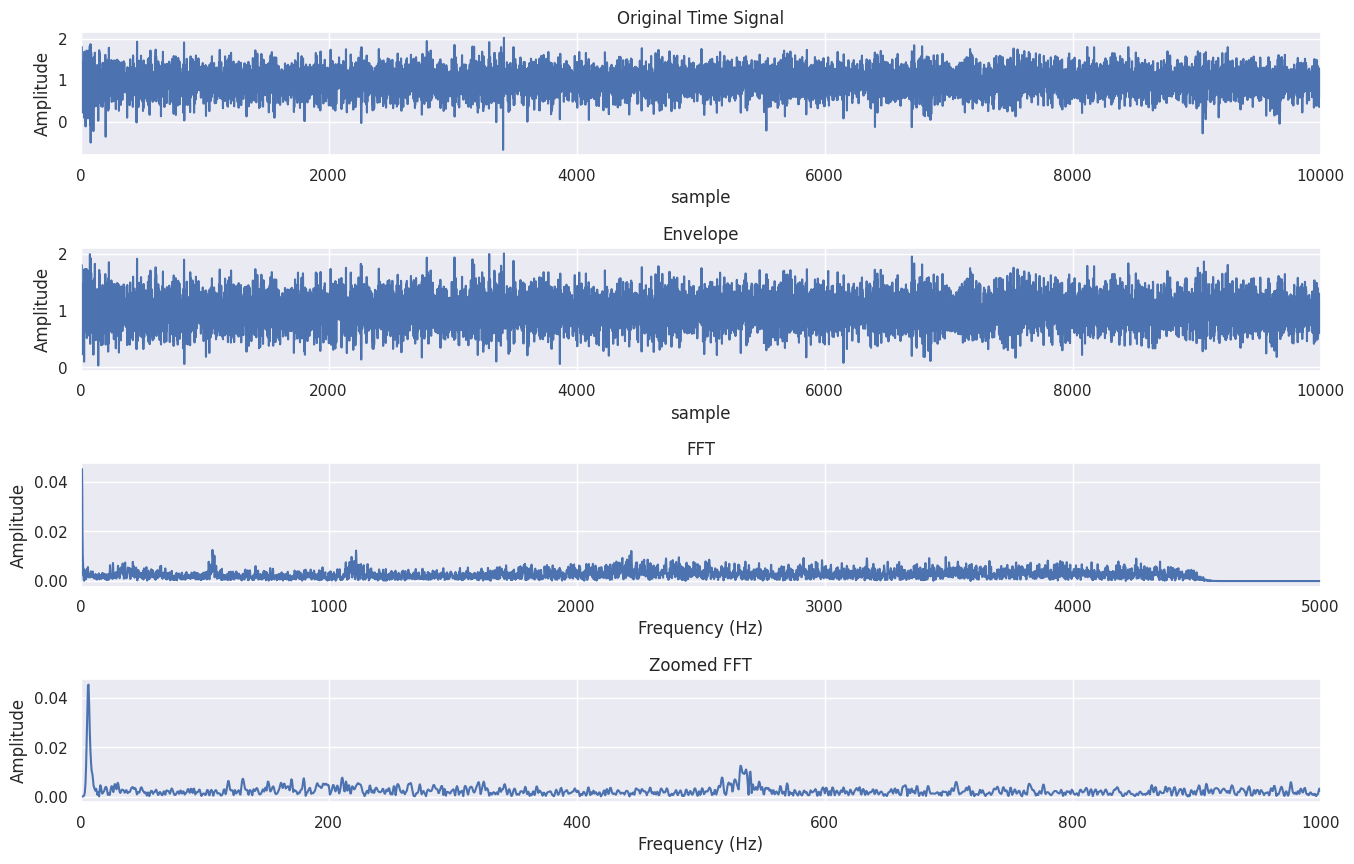

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 10000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 10000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(10000, 10000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 5000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

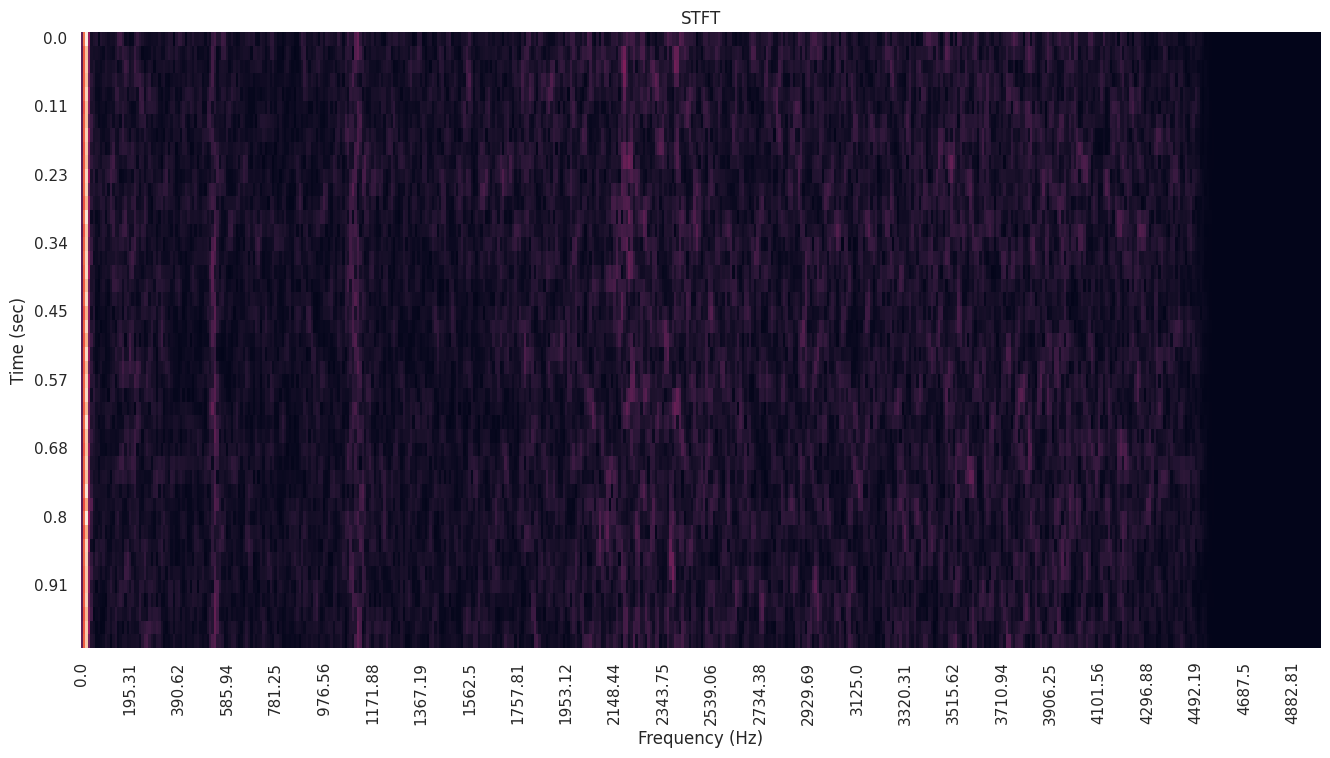

In [21]:
t = np.linspace(0, 1, 45)
f = fft_freq_axis(1024, 10000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])

fig.show()